In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from scipy import signal

from glob import glob
import pickle

from main_dnn import train, inference
from evaluate import calculate_pesq

In [7]:
workspace = './workspace_full'
df_md1 = calculate_pesq(workspace, speech_dir='../../../datasets/TIMIT/data/TEST',
                        te_snr=[-30, -25, -20, -15, -10, -5, 0], model_name='MD1')
df_md2 = calculate_pesq(workspace, speech_dir='../../../datasets/TIMIT/data/TEST',
                        te_snr=[-30, -25, -20, -15, -10, -5, 0], model_name='MD2')

PESQ is already calculated
PESQ is already calculated


In [8]:
df_input = calculate_pesq(workspace, speech_dir='../../../datasets/TIMIT/data/TEST',
                          te_snr=[-30, -25, -20, -15, -10, -5, 0], model_name='input',
                          calc_mixed=True)

PESQ is already calculated


In [9]:
md1_pesqs = df_md1.groupby('snr').agg({'pesq': ['mean']})['pesq']['mean']
md2_pesqs = df_md2.groupby('snr').agg({'pesq': ['mean']})['pesq']['mean']

In [10]:
input_pesqs = df_input.groupby('snr').agg({'pesq': ['mean']})['pesq']['mean']
input_pesqs

snr
-30    1.324264
-25    1.286573
-20    1.302732
-15    1.129027
-10    1.280088
-5     1.577707
 0     1.942407
Name: mean, dtype: float64

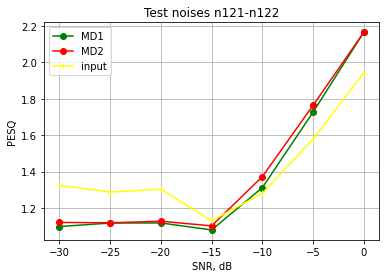

In [11]:
plt.plot(md1_pesqs.index, md1_pesqs, label='MD1', c='green', marker='o')
plt.plot(md2_pesqs.index, md2_pesqs, label='MD2', c='red', marker='o')
plt.plot(input_pesqs.index, input_pesqs, label='input', c='yellow', marker='|')
plt.grid(which='both')
plt.ylabel('PESQ')
plt.xlabel('SNR, dB')
plt.title('Test noises n121-n122')
plt.legend()
plt.savefig('n121-n122.pdf', bbox_inches='tight')
plt.show()